<H1>Chapter 3 - Stacks and Queues</H1>

<B>3.1 Three in One:</B> Describe how you could use a single array to implement three stacks

In [ ]:
#understanding the problem

#a stack is just a list or collection of items with the restriction that items go in and out from the same side, LIFO
#can be implemented with an array (or list in python), where we push items using .append() and pop using .pop()
# we could create three stacks by setting limits where one stack would start, and another begins
    #for example if we have an array of size 30, we could make 1 to 10 stack 1, 11 to 20 stack 2, etc.
    
#this method would force us to add limits to a stack (python lists automatically adjust size)

In [1]:
#Examples

#stack 1 = list[0:10]
#stack 2 = list[11:20]
#stack 3 = list[21:30]

#we would need to keep track of where the top in each list is, and iterate this everytime we push or pop

#example 1, all 3 stacks are empty
#example 2, one of the stacks is empty
#example 3, all of the stacks are full
#example 4, one of the stacks is full
#example 5, none of the stacks are full, or empty

In [2]:
#Sketching out a solution:

#create one array (list in python)
#define stack
#set limits for each stack, i.e. if we try to add to stack one but there is already an item at my_list[10]
    #should return an error
#set markers for the top or each stack, when the stack is empty, pop() should return nothing, not top of the previous stack

In [ ]:
class ThreeStacks:
    
    def __init__(self,array=[],n):
        self.array = array
        self.n = n #max size of array
    
        self.stack1 = array[0:n/3]
        self.stack2 = array[n/3:(2*n)/3]
        self.stack3 = array[(2*n)/3:n]
        
    def isFull(self,stack,x):
        
        if stack == 0 and 

        #to do


In [ ]:
#spend some time looking up circular arrays, and how to implement them

<B>3.2 Stack Min:</B> How would you design a stack which, in addition to push and pop, has a function which returns the minimum element? Push, pop, and min should operate in O(1) time.

In [3]:
#understanding the problem

#in order for min() to be O(1) time, that means we can't waste time traversing checking for the min
#we have to have a way to know the min 

#one idea that comes to mind is to create a min pointer. When the list is initialized:
    #min starts as the first item
    #if an item is pushed onto stack, we should confirm that min is still smaller, if not:
        #min should be set as the new item pushed onto stack
    #before popping an item off the stack, we should check if it was the minimum, if it was
        #we will have to make sure that we change the minimum to the appropriate minimum

#to account for popping a minimum, and ensuring that the next call to get_minimum is accurate 
    #we should keep a seperate stack of minimums 
        
#this assumes that the stack starts as empty, or with one item inside
#if we started with a stack of multiple items, we would have to figure out the min by traversing 

#another way to solve the problem would be to build in the stacks minimum value at each node
#that way, when a node is popped, and it is the minimum, we just go to the next nodes minimum

In [4]:
#test cases

#stack is empty
#stack is not empty but only has one item, return item
#we create a stack, then push (3,5,1), so that the min has to change, should return 1
#we create a stack, then push (1,10,5), the min does not change, should return 1
#we create a stack, then push (1,10,1), the min does not change, should still return 1


In [70]:
#Implementing solution, using linked list implementation of stack

class Node:
    
    def __init__(self,data):
        self.data = data
        self.next = None
        self.minimum = data

class Stack:
    
    def __init__(self):
        self.top = None
    
    
    def __repr__(self):
        stack_string = []
        temp = self.top
        while temp is not None:
            stack_string.append(str(temp.data))
            temp = temp.next
        
        return "Top-->"+",".join(stack_string)
    
    def push(self,x):
        new_node = Node(x)
        new_node.next = self.top
        self.top = new_node
        
        #deal with minimum
        if self.top.next is not None:
            if self.top.minimum >= self.top.next.minimum:
                self.top.minimum = self.top.next.minimum

    def pop(self):
        
        if self.top is None:
            print("The stack is empty, cannot pop.")
        else:
            self.top = self.top.next
            
    def get_minimum(self):
        if self.top is None:
            print("The stack is empty, there is no minimum value")
        else:
            return self.top.minimum
    
    
        

In [71]:
#stack is empty
#stack is not empty but only has one item, return item
#we create a stack, then push (3,5,1), so that the min has to change, should return 1
#we create a stack, then push (2,10,5), the min does not change, should return 2
#we create a stack, then push (1,10,1), the min does not change, should still return 1
#we create a stack, push (3,5,1), so that the min is 1, then we pop, so that min should be 3

test_cases = [[],
              [1],
              [3,5,1],
              [2,10,5],
              [1,10,1]
             ]

#Will also need to test for cases where the minimum value is popped

In [72]:
for test in test_cases:

    my_stack = Stack()
    for item in test:
        my_stack.push(item)

    print("The stack looks like this:")
    print(repr(my_stack))
    print("the minimum value is:")
    print(my_stack.get_minimum())
    print()
    
    del my_stack

The stack looks like this:
Top-->
the minimum value is:
The stack is empty, there is no minimum value
None

The stack looks like this:
Top-->1
the minimum value is:
1

The stack looks like this:
Top-->1,5,3
the minimum value is:
1

The stack looks like this:
Top-->5,10,2
the minimum value is:
2

The stack looks like this:
Top-->1,10,1
the minimum value is:
1



In [76]:
#testing case with pop

my_stack = Stack()
my_stack.push(5)
my_stack.push(10)
my_stack.push(20)
my_stack.push(1)
print("Before popping the 1, The stack looks like this:")
print(repr(my_stack))
print("the minimum value is:")
print(my_stack.get_minimum())
my_stack.pop()

print("After popping the 1, the stack looks like this:")
print(repr(my_stack))
print("the minimum value is:")
print(my_stack.get_minimum())

Before popping the 1, The stack looks like this:
Top-->1,20,10,5
the minimum value is:
1
After popping the 1, the stack looks like this:
Top-->20,10,5
the minimum value is:
5


<B>3.3 Stack of Plates:</B> Imagine a (literal) stack of plates. If the stack gets too high, it might topple. Therefore, in real life, we would likely start a new stack when the previous stack exceeds some threshold. Implement a data structure SetOfStacks that mimics this. SetOfStacks should be composed of several stacks and should create a new stack once the previous one exceeds capacity. SetOfStacks.push() and SetOfStacks.pop() should behave identically to a single stack (that is, pop() should return the same values as it would if there were just a single stack).

FOLLOW UP

Implement a function popAt(int index) which performs a pop operation on a specific sub-stack.

In [77]:
#understanding the question

#creating stacks that have a maximum capcity, i.e. 10
# once we are at maximum capacity, and we want to push, we need to create a new stack
#once a stack is emptied from popping, and we want to call pop, we will need to pop from the previous stack
#for popAt() we will need to have a way to reference a specific stack

In [78]:
#possible scenarios For push():

#pushing onto blank stack (no previous stacks exist), should create a stack, and push to it
#pushing onto a stack at max capacity, should create a new stack and push to new stack
#push to stack that is not at capacity but not empty, should push to stack

#possible scenarios For pop():

#pop() on empty stack (no previous stacks exist), should return an error message
#pop() on empty stack, but previous stacks exist, should pop from previous stack
#pop() on stack that's not empty, should pop() as normal

#possible scenarios For popAt(index):

#given index does not exist, there is no stack at that index, should return an error
#given index does exist, but the stack is empty (i.e. was popped to 0), should return an error message, stack empty
#given index does exist, and stack is not empty, should pop() as normal

In [79]:
#sketching out a solution:

#first thoughts:

#SetOfStacks should take a max_capacity parameter

#when we want to push(x), we check if current stack is at max capacity, keep track of current stack with index i
#count number of items pushed on current stack in variable size
#if size == max_capacity, we start a new stack, push(x), and reset size to 1, and iterate index i

#when we want to pop(): we check if current stack isEmpty, if yes, we decrement i, pop(), and set size to 9
#if current stack is not empty, we pop() and decrement size

#for popAt(index), we check if i >= index
#if yes, we pop at index
#if not, we return error message

#After reflection, it seems like it would be valuable (to account for popAt(index)) if we kept track of size of each stack
#as an attribute

#this would take up some more space, depending on how many stacks we are looking to implement
#but in this way we can check then if the stack has a size>0


#another possible solution, thought a bit more complicated would be to delete stacks as they become empty, and dynamically
#change the indexes. For example, if we had 3 stacks, and called popAt(2), until stack2 was empty,
#we could delete stack 2, and then reassign stack3 as stack2

#to make the solution more dynamic, we will create a linked list, that holds stacks instead of nodes
#when a stack is empty, we will remove that node

#Implementing a solution with a linked list of stacks


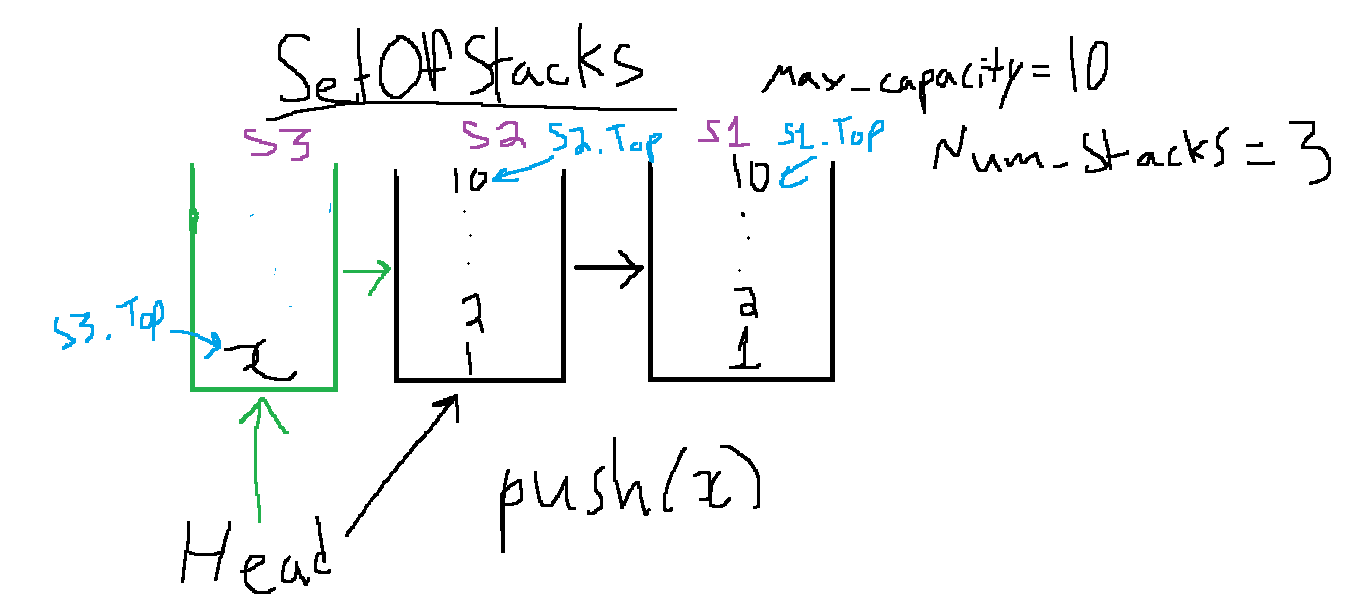

In [146]:
class Node:
    
    def __init__(self,data):
        self.data = data
        self.next = None
        
class Stack:
    
    def __init__(self):
        self.top = None
        self.size = 0
        self.next = None
    
    def __repr__(self):
        stack_string = []
        temp = self.top
        while temp is not None:
            stack_string.append(str(temp.data))
        return "Top-->"+", ".join(stack_string)
    
    def push(self,x):
        
        new_node = Node(x)
        new_node.next = self.top
        self.top = new_node
        self.size += 1
        
    def pop(self):
        if self.top is None:
            print("The list is Empty, cannot pop")
        else:
            self.top = self.top.next
            self.size -= 1
            
    def isEmpty(self):
        return self.top == None
    
class SetOfStacks:
    
    def __init__(self,max_capacity=3): #setting max_capacity to 3 by default
        self.max_capacity = max_capacity
        self.num_stacks = 0
        self.head = None
        self.next = None
        
    
    def print_set(self):
        string_of_stacks = []
        temp = self.head
        print("TOP of TOP")
        while temp is not None:
            sub_temp = temp.top
            while sub_temp is not None:
                string_of_stacks.append(str(sub_temp.data))
                sub_temp = sub_temp.next
            temp = temp.next
            print("   TOP-->"+",".join(string_of_stacks))
            string_of_stacks = [] #reset for next stack
        print("Number of stacks is: {}".format(self.num_stacks))
    
    def push(self,x):
        
        #stack is empty
        if self.head is None:
            new_stack = Stack()
            self.num_stacks += 1
            self.head = new_stack
            self.head.push(x)
        else:
            #stack is full
            if self.head.size == self.max_capacity:
                new_stack = Stack()
                self.num_stacks += 1
                new_stack.next = self.head
                self.head = new_stack
                self.head.push(x)
            else:
                #stack is not full, push as normal
                self.head.push(x)
    
    def pop(self):
        
        #first stack is empty
        if self.head.isEmpty()==True:
            #check if next stack is empty
            if self.head.next.isEmpty()==True:
                print("Stacks are empty, cannot pop.")
            else:
                #pop from next stack
                self.head.next.pop()
                #check if stack became empty
                if self.head.next.isEmpty()==True:
                    self.num_stacks -= 1
                    
        else:
            self.head.pop()
            #check if stack became empty
            if self.head.isEmpty()==True:
                self.num_stacks -= 1
                #adjust links
                self.head = self.head.next
    
    def popAt(self,index):
        #index doesnt exist (we don't have that many stacks)
        if self.num_stacks < index: #assuming index starts at 1
            print("No stack{}. Cannot pop.".format(index))
        else:
            #we are starting from the latest stack, i.e. stack3 when num_stacks = 3
            difference = self.num_stacks-index
            temp = self.head
            while difference > 0:
                #iterate through the stacks
                temp = temp.next
                difference -= 1
            #difference is 0:
            temp.pop()
            if temp.isEmpty()==True:
                self.num_stacks -= 1
                #adjust links
                if temp == self.head:
                    self.head = self.head.next
                #if tail, temp.prev.next = none
                


In [157]:
test = SetOfStacks()
test.push(7)
test.push(3)
test.push(5)
test.push(10)
test.push(2)
test.push(8)
test.push(9)
test.push(3)
test.push(7)
test.push(40)
test.pop()
# test.pop()
# test.pop()
# test.pop()
# test.pop()
# test.pop()
# test.pop()
test.popAt(3)
#test.popAt(3)
#test.popAt(3)
#test.popAt(3)
test.popAt(1)
test.popAt(1)
test.popAt(1)
test.popAt(1) 
# test.popAt(1)
test.pop()


test.print_set()

TOP of TOP
   TOP-->9
   TOP-->2,10
   TOP-->
Number of stacks is: 2


<B>3.4 Queue via Stacks:</B> Implement a MyQueue class which implements a queue using two stacks

In [159]:
#Understanding the question

#A queue is just a list, or collection of items with the constraint that new items are added to the back, and items are removed from the front
#FIFO system

#the following methods must run in O(1) time
#add(x)
#remove()

#A stack is a LIFO system
#has the constraint that new items are added to the top (or front), and items can only by accessed by the top (or front) as well

#A stack can be used to reverse a linked list, and a stack can also be implemented using a linked list
#we could in effect have a queue, by reversing a stack
#we could simply pop() and push() all values of stack1 to stack2, as soon as a remove() is called


#however this would violate the O(1) runtime of remove() for our queue. remove() would be O(N) time complexity for our queue

#hint from book: "can we optimize for scenarios where we might do several pops in a row?"

#everytime remove() is called, we can use the second stack to reverse the first.
#we can keep using this reversed stack until add(x) is called, then we can delete stack 2, and recreate it the next time remove() is called


In [ ]:
#Test cases:

#tries to remove() before add, returns error
#add(x), remove(), returns x
#add(1), add(2), add(3), remove(), returns 3 
#add(1), add(2), add(3), remove(), returns 3, remove(), returns 2 
#add(1), add(2), add(3), remove(), returns 3, add(4), remove(), returns 4, remove(), returns 2

In [208]:
class Node:
    
    def __init__(self,data):
        self.data = data
        self.next = next
        
class Stack:
    
    def __init__(self):
        self.top = None
        
    def __repr__(self):
        stack_string = []
        temp = self.top
        while temp is not None:
            stack_string.append(str(temp.data))
            temp = temp.next
        return "TOP-->"+",".join(stack_string)
    
    def push(self,x):
        new_node = Node(x)
        new_node.next = self.top
        self.top = new_node

    def pop(self):
        if self.top is None:
            print("Stack is empty, cannot pop")
        else:
            self.top = self.top.next
    
    def peek(self):
        if self.top is None:
            print("Stack is empty")
        else:
            return self.top
        
    def isEmpty(self):
        return self.top == None
    
    
class MyQueue:
    
    def __init__(self):
        self.front = self.rear = None
        self.stack1 = Stack()
        self.stack2 = Stack()
        self.popped = False
    
    def __repr__(self):
        q = []
        if self.popped==False:
            temp = self.stack1.top
            while temp is not None:
                q.append(str(temp.data))
                temp = temp.next
            return "REAR-->"+",".join(q)+"<--FRONT"
        else:
            temp = self.stack2.top
            while temp is not None:
                q.append(str(temp.data))
                temp = temp.next
            return "FRONT-->"+",".join(q)+"<--Rear"
            
    
    def add(self,x):
        
        if self.popped == True:
            #set stack1 = stack2 reversed
            self.reverse(self.stack2,self.stack1)
            self.stack1.push(x)
        else:
            self.stack1.push(x)
        
        #have to reset stack2 each time new item is added
        self.stack2 = Stack()   
        #reset pop_counter
        self.popped = False

        
    #create reverse method, to reverse stack 1
    def reverse(self,stack,result_stack):
        # temp = self.stack1.top
        # while temp is not None:
        #     self.stack2.push(temp.data)
        #     temp = temp.next
        
        temp = stack.top
        while temp is not None:
            result_stack.push(temp.data)
            temp = temp.next
        
        
        
    def remove(self):
        
        if self.popped==False:
            self.reverse(self.stack1,self.stack2)
            self.stack2.pop()
            #set popped = True
            self.popped = True
        else:
            self.stack2.pop()
            #iterate pop(counter)
        #have to reset stack1 each time new item is removed
        self.stack1 = Stack()
        
#we have to have a way to update stack1, after an item has been removed
#i.e. set stack1 equal to the reverse stack2, after items have been removed from stack 2
  
    

In [216]:
#Test cases:

#tries to remove() before add, returns error                                                     PASSED
#add(x), remove(), removes x                                                                     PASSED
#add(1), add(2), add(3), remove(), removes 1                                                     PASSED
#add(1), add(2), add(3), remove(), removes 1, remove(), removes 2                                PASSED
#add(1), add(2), add(3), remove(), removes 1, add(4), remove(), removes 2, remove(), removes 3   PASSED

q = MyQueue()
q.add(1)
q.add(2)
q.add(3)
q.remove()
q.add(4)
q.remove()
q.remove()

print(repr(q))

FRONT-->4<--Rear


<B>3.5 Sort Stack:</B> Write a program to sort a stack such that the smallest items are on the top. You can use an additional temporary stack, but you may not copy the elements into any other data structure (such as an array). The stack supports the following operations: push, pop, peek and isEmpty.

In [ ]:
#understanding the problem
#stack is sorted from smallest to largest:
#pop() or peek() will return items in order of smallest to largest


In [ ]:
#Test cases

#stack is empty, stack.sort(), should return error message
#stack is 5, after stack.sort(), should return error message 
#stack is 1,5,10, after stack.sort(), 1,5,10
#stack is 5,1,10, after stack.sort(), 1,5,10
#stack is 10,5,1, after stack.sort(), 1,5,10


In [ ]:
#Sketching a solution:


#the first idea that comes to mind, is to iterate through every item in the stack, and making sure all items below it are lesser in value
#if not, items are moved to the temporary stack (that section of the stack is reversed)
#this would take O(N^2) time complexity for worst case 


# Another way would be to use Insertion Sort

# break into two subsections, sorted stack and non-sorted
# we iterate through the unsorted items, for each element in the sorted section that is greater than the element, we move one to the right, then we insert the element into the appropriate index of sorted
# we repeat the process until the unsorted section is empty (in reality we are constantly increasing the boundry of the sorted)


In [ ]:
#algorithm

#create sorted_stack (we will be sorted in ascending order (with the largest number at the top))
#pop() from stack, and push to sorted_stack
#while stack.isEmpty() == False
    #compare stack.pop to sorted_stack.peek()
        #if greater than push
        #if lesser, swap the items with pop and push
#once original stack is empty
#pop and push all items from sorted_stack back to stack

In [115]:
#implenting stack as a linked list:

#creating node class
class Node:
    
    def __init__(self,data):
        self.data = data
        self.next = None

#creating stack class
class Stack:
    
    def __init__(self):
        self.top = None
        
    def __repr__(self):
        stack_string = []
        temp = self.top
        while temp is not None:
            stack_string.append(str(temp.data))
            temp = temp.next
        return "TOP-->"+",".join(stack_string)
    
    def push(self,data):
        new_node = Node(data)
        new_node.next = self.top
        self.top = new_node
    
    def pop(self):
        
        if self.top is None:
            print("The stack is empty, cannot pop.")
        else:
            popped = self.top.data
            self.top = self.top.next
            return popped
    
    def peek(self):
        return self.top.data
    
    def isEmpty(self):
        return self.top==None
            
            
#Create function to sort a stack, with the smallest items ontop 

def insertion_sort(stack):

    if stack.top is None:
        return "stack is empty, cannot sort an empty stack"
    elif stack.top.next is None:
        return "stack only has one item. Cannot sort a one item stack"
    
    print("before the isertion sort: "+repr(stack))
    #create sorted_stack (we will be sorted in ascending order (with the largest number at the top))
    sorted_stack = Stack()
    #pop() from stack, and push to sorted_stack
    sorted_stack.push(stack.pop())

    while stack.isEmpty() == False:
        #compare stack.pop to sorted_stack.peek()
        popped = stack.pop()
        while (sorted_stack.top is not None) and (popped < sorted_stack.peek()):
                stack.push(sorted_stack.pop())
        #if greater than push
        sorted_stack.push(popped)
    
    #stack is now empty, pop and push all items from sorted_stack back to stack
    while sorted_stack.isEmpty() == False:
        stack.push(sorted_stack.pop())
    print("after the insertion sort: ")
    print(repr(stack))

        

In [119]:
#Test cases

#stack is empty, stack.sort(), should return error message   PASS
# my_stack = Stack()
# insertion_sort(my_stack)

#stack is 5, after stack.sort(), should return error message  PASS
# my_stack = Stack()
# my_stack.push(5)
# insertion_sort(my_stack)

#stack is 1,5,10, after stack.sort(), 1,5,10 #already sorted  PASS
# my_stack = Stack()
# my_stack.push(10)
# my_stack.push(5)
# my_stack.push(1)
# insertion_sort(my_stack)

#stack is 5,1,10, after stack.sort(), 1,5,10   PASS
# my_stack = Stack()
# my_stack.push(10)
# my_stack.push(1)
# my_stack.push(5)
# insertion_sort(my_stack)

#stack is 10,5,1, after stack.sort(), 1,5,10  PASS
# my_stack = Stack()
# my_stack.push(1)
# my_stack.push(5)
# my_stack.push(10)
# insertion_sort(my_stack)

#stack is 5,3,7,2,1 after stack.sort(), 1,2,3,5,7  PASS
my_stack = Stack()
my_stack.push(1)
my_stack.push(2)
my_stack.push(7)
my_stack.push(3)
my_stack.push(5)
insertion_sort(my_stack)




before the isertion sort: TOP-->5,3,7,2,1
after the insertion sort: 
TOP-->1,2,3,5,7


<B>3.6 Animal Shelter:</B> An animal shelter, which holds only dogs and cats, operates on a strictly "first in, first out" basis. People must adopt either the "oldest"(based on arrival time) of all animals at the shelter, or they can select whether they prefer a dog or a cat (and they will receive the oldest animal of that type). They cannot select which specific animal they would like. Create the data structure to maintain this system and implement operations such as enqueue, dequeueAny, dequeueDog, and dequeueCat. You may use the built-in LinkedList data structure.

**Understanding the problem:**

- we have a first in first out system (a queue)
- they can select the fist in the queue, or the first of a certain type, there are two types, cat and dog

Option one: two queues

dog1<--dog2<--dog3

cat1<--cat2<--cat3

- have to think about a way to maintain the overal order of arrival, regardless of type, for those who just want the oldest
- one way might be to store the arrival time in the database, that way for the above case, we could take the max(cat.front.arrival, dog.front.arrival) 
    - a disadvantage of this would be the extra data we store
    - but the advantage would be it would help us quickly access the oldest, while also being able to quickly access oldest of each type

Option two: one queue

dog1<--cat1<--dog2<--dog3<--cat2<--cat3

- another way without storing the arrival data (i.e. we only have one queue available)
    - for dequeue we just take the front
    - for dequeueType(type) we would have to iterate through the queue until we find the first instance of that type
        - this could take a while if for example the first instance of a cat was at the back of the queue
        - but this would be a good solution if memory/storage was a problem
        
Assuming there are no memory/storage constraints that prevent two queues, and the storng of an arrival date (days_since_arrived), I would choose option one
 
Thinking further... A third option could be to have one queue, but store the information on the front, tail, and the oldest of each type, that way we could access them directly. It would be a little bit more complicated to implement this code, because we would need to keep tack of what is the next oldest cat once we exact the oldest cat, etc. It would also not be much different in terms of speed compared to option two.


In [152]:
#sketching a solution

#define node(animal) class
class Animal:
    
    def __init__(self,species,order): #order of arrival
        self.species = species
        self.order = order
        self.next = None
        
#define queue class
class Queue:
    
    def __init__(self):
        self.front = self.back = None
        
        
    def __repr__(self):
        queue_string=[]
        temp = self.front
        while temp is not None:
            queue_string.append(temp.species+str(temp.order))
            temp = temp.next
        return("FRONT-->"+('<--').join(queue_string)+'<--BACK')
    
    def enqueue(self,species,order):
        new_animal = Animal(species,order)
        if self.front is None:
            self.front = self.back = new_animal
        else:
            self.back.next = new_animal
            self.back = new_animal
    
    def dequeue(self):
        if self.front is None:
            print("The queue is empty, no animals to dequeue")
        else:
            dequeued = self.front
            self.front = self.front.next 
            return dequeued.species+" was selected. They were the animal number {} to arrive at the shelter.".format(dequeued.order)
        
#Define animal_shelter class
class AnimalShelter:
    
    def __init__(self):
        self.order = 1
        self.cats = Queue()
        self.dogs = Queue()
        
    def __repr__(self):
        return "cats:    "+repr(self.cats)+"   dogs: "+repr(self.dogs)
        
    def enqueue(self,species):
        if species=="cat":
            self.cats.enqueue("cat",self.order)
            self.order += 1
        elif species=="dog":
            self.dogs.enqueue("dog",self.order)
            self.order += 1
        else:
            print("Sorry. We only accept cats and dogs.")
            
    #dequeueAny
    def dequeueAny(self):
        #check the max of cats and dog heads
        if self.cats.front is None:
            self.dogs.dequeue()
        elif self.dogs.front is None:
            self.cats.dequeue()
        else:
            if self.cats.front.order < self.dogs.front.order:
                self.cats.dequeue()
            else:
                self.dogs.dequeue()
    
    def dequeueDog(self):
        self.dogs.dequeue()
    
    def dequeueCat(self):
        self.cats.dequeue()

    
 

# test cases:

## enqueue
- [x] enqueue dog
- [x] enqueue cat 

## dequeueAny
- [x] called when both queues are empty
- [x] called when one queue is empty
- [x] called when there are cats and dogs


## dequeueDog
- [x] called when there are no dogs
- [x] called when there are only dogs
- [x] called when there are dogs and cats, and cats arrived first
- [x] called when there are dogs and cats, and dog arrived first

## dequeueCat
- [x] called when there are no cats
- [x] called when there are only cats
- [x] called when there are dogs and cats, and dogs arrived first
- [x] called when there are dogs and cats, and cats arrived first



In [173]:
my_shelter = AnimalShelter()
# my_shelter.enqueue('dog')
my_shelter.enqueue('cat')
my_shelter.enqueue('dog')

print(my_shelter)
my_shelter.dequeueCat()
# my_shelter.dequeueDog()
# my_shelter.dequeueAny()
print(my_shelter)

cats:    FRONT-->cat1<--BACK   dogs: FRONT-->dog2<--BACK
cats:    FRONT--><--BACK   dogs: FRONT-->dog2<--BACK
